In [223]:
from pathlib import Path
import matplotlib.pyplot as plt
import contextily as cx

In [224]:
from utils import get_omgevingsvergunning_areas
REGIONS_FOLDER = Path('data/regions')   

# Load region polygons.
df_regions = get_omgevingsvergunning_areas(REGIONS_FOLDER)
df_regions.head()

,OBJECTID,Shape,EMPLACEMEN,JDSNUMMER,STArea__,STLength__,geometry,regex
0,1,NaN,Leiden Centraal,3635629.0,83285.475543,509.0,"POLYGON ((4.47466 52.16128, 4.47466 52.16128, ...",True
1,2,NaN,Beverwijk,3732143.0,16001.898386,316.0,"POLYGON ((4.65393 52.47650, 4.65392 52.47650, ...",True
2,3,NaN,Utrecht Centraal Station,3735363.0,233241.949259,833.0,"POLYGON ((5.08696 52.09800, 5.08694 52.09800, ...",True
3,4,NaN,Arnhem West,3712004.0,184453.429502,474.0,"POLYGON ((5.87524 51.98714, 5.87524 51.98715, ...",True
4,5,NaN,Steenwijk,NaN,14013.100241,169.0,"POLYGON ((6.11151 52.79215, 6.11152 52.79216, ...",True


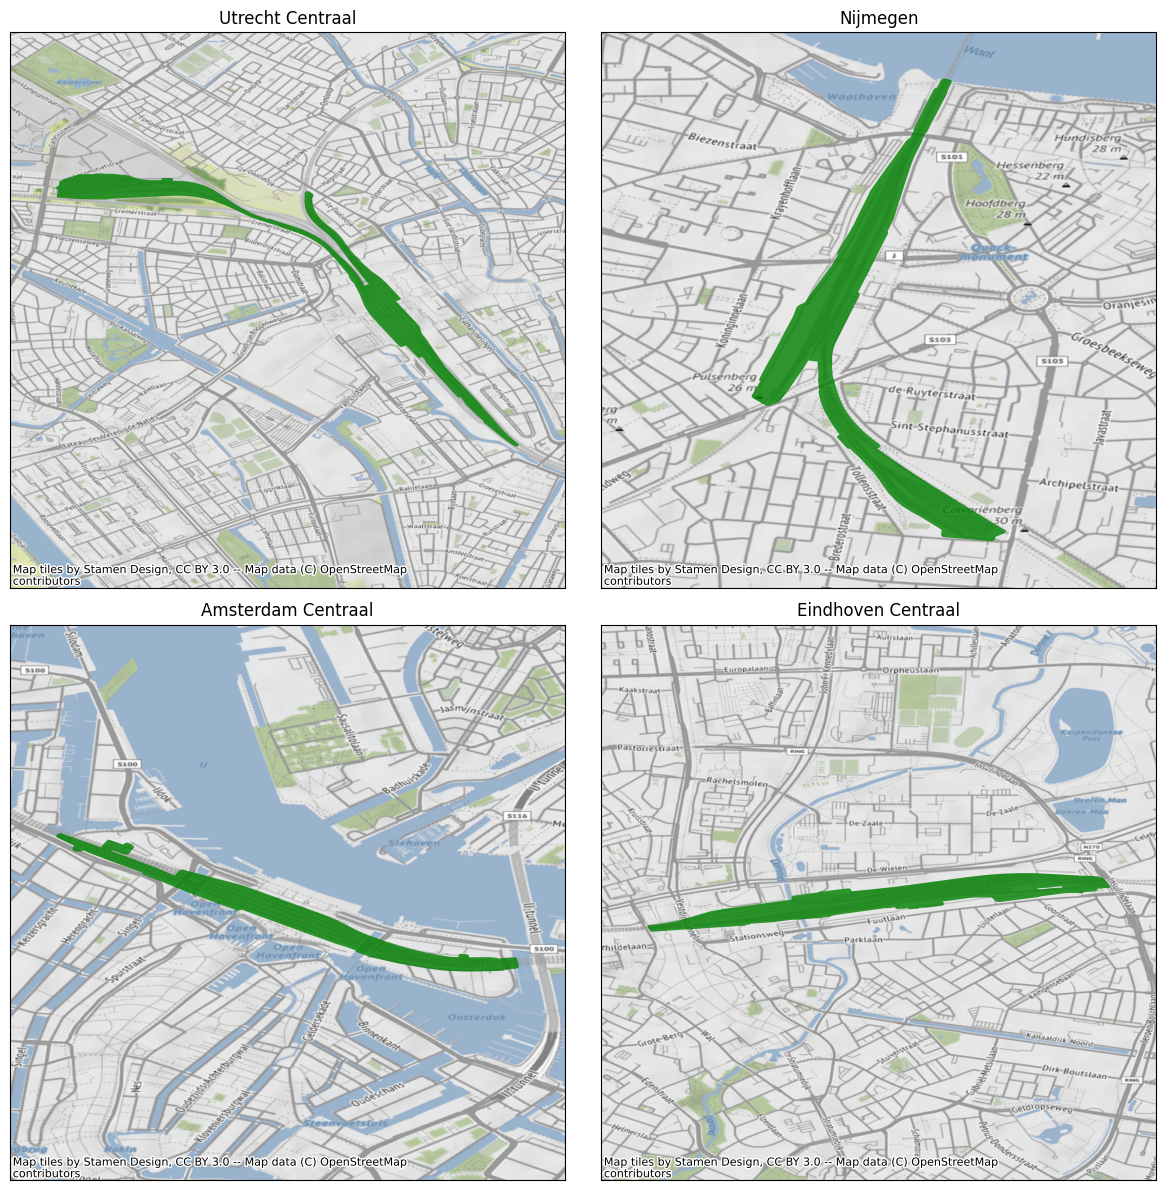

In [225]:
# Plot four regions.
REGIONS = ['Utrecht Centraal Station', 'Nijmegen', 'Amsterdam CS', 'Eindhoven']
TITLES = ['Utrecht Centraal', 'Nijmegen', 'Amsterdam Centraal', 'Eindhoven Centraal']
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for r, title, ax in zip(REGIONS, TITLES, axs.flat):
    # Plot region polygon.
    region = df_regions.where(df_regions.EMPLACEMEN == r)
    region.plot(ax=ax, aspect='equal', alpha=0.8, color='green')

    # Set title and remove labels.
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

    # Determine bounds for square images.
    x1, y1, x2, y2 = region.total_bounds
    dx = x2 - x1
    dy = y2 - y1
    r = dx / dy

    if r > 1:
        y1 = y1 - (dy * (r - 1) / 2)
        y2 = y2 + (dy * (r - 1) / 2)
    else:
        x1 = x1 - (dx * (1 / r - 1) / 2)
        x2 = x2 + (dx * (1 / r - 1) / 2)

    # Zoom out slightly.
    dx = x2 - x1
    dy = y2 - y1
    zoom = 0.1

    ax.set_xlim(x1 - zoom * dx, x2 + zoom * dx)
    ax.set_ylim(y1 - zoom * dy, y2 + zoom * dy)

    # Add background map.
    cx.add_basemap(ax, crs="EPSG:4326")

fig.tight_layout()